# Visualización de datos a través de estratos

**Objetivos**

- Crear interactividad en los gráficos de dispersión utilizando altair
- Utilizar el zoom in y out, hover y tooltip, y seleccionar y resaltar en los gráficos de dispersión
- Crear gráficos de barras y mapas de calor interactivos
- Crear enlaces dinámicos entre diferentes tipos de gráficos dentro de una única visualización interactiva

En este capítulo, aprenderá a crear visualizaciones interactivas para datos estratificados con respecto a cualquier variable categórica.

## Introducción

- Una observación hecha en la sección anterior fue que cuando cuando se trata de introducir interactividad en ciertos tipos de gráficos de **Python**, `plotly` puede a veces ser verboso, y puede implicar una curva de aprendizaje empinada. Por lo tanto, en este capítulo, presentaremos `altair`, una biblioteca diseñada especialmente para generar gráficos interactivos. - Demostraremos cómo crear visualizaciones interactivas con `altair` para datos estratificados con respecto a cualquier variable categórica. A modo de ilustración, utilizaremos un conjunto de datos para generar gráficos de dispersión y de barras con las características del conjunto de datos y añadir una variedad de elementos interactivos a los gráficos. También conoceremos algunas ventajas específicas del uso de `altair` sobre una biblioteca más polivalente como `plotly`.
- Utilizaremos el conjunto de datos del Índice de Felicidad Planetaria (IPH) http://happyplanetindex.org/ a lo largo de esta sección. Este conjunto de datos muestra en qué lugares del mundo la gente utiliza recursos ecológicos de forma más eficiente para vivir una vida larga y feliz. No sólo es un recurso interesante para conocer mejor las condiciones ecológicas y el bienestar socioeconómico de bienestar socioeconómico en varias partes de nuestro planeta, sino que también tiene una interesante mezcla de características que nos ayudan a demostrar ciertos conceptos clave de la visualización interactiva.

## Gráficos de dispersión interactivos

- Como ya sabe, los gráficos de dispersión son uno de los tipos de gráficos más esenciales para presentar patrones globales dentro de un conjunto de datos. Naturalmente, es importante saber cómo introducir la interactividad en estos gráficos. En primer lugar, veremos las acciones de zoom y restablecimiento de los gráficos. Antes de eso, sin embargo, vamos a echar un vistazo al conjunto de datos. Podemos ver el conjunto de datos del **IPH** utilizando el siguiente código

In [149]:
import pandas as pd

hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')
hpi_df.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


- Tenga en cuenta que hay 5 características numéricas/cuantitativas en este conjunto de datos: 
    - **Life Expectancy (years)**
    - **Wellbeing (0-10)**
    - **Inequality of outcomes**
    - **Ecological Footprint (gha/capita)**
    - **Happy Planet Index**
- Hay dos características categóricas/nominales: Country y Region. En `altair` los rasgos cuantitativos se denotan como **Q**, y los rasgos nominales se denotan como **N**. Veremos pronto cómo utilizar esto en nuestras visualizaciones.
- Generemos y observemos un gráfico de dispersión estático, mediante un ejercicio, de las caracteristicas **Wellbeing (0-10)** and **Happy Planet Index** para cada país, utilizando diferentes colores para denotar la región a la que pertenece el país y seguir adelante y añadirle interactividad.

## Ejercicio 27: Añadir Zoom-In y Zoom-Out a un gráfico de dispersión estático

- En este ejercicio, generaremos un gráfico de dispersión estático utilizando `matplotlib`. Utilizaremos el conjunto de datos **hpi_data_countries** para el gráfico y analizaremos las puntuaciones de **Wellbeing** de cada país representado por la leyenda del gráfico. Seguiremos adelante y añadiremos una función de `zoom`. Para ello utilizaremos la biblioteca `altair`.

- Cargar el conjunto de datos **hpi** y leer desde el conjunto de datos usando pandas:

In [150]:
import pandas as pd

hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')

- Trazar un gráfico de dispersión estático utilizando `matplotlib`

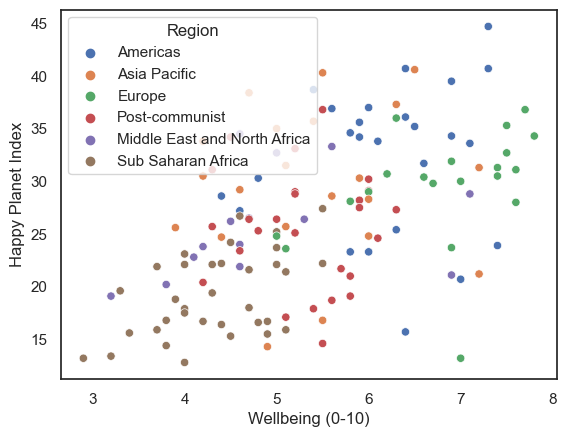

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='Wellbeing (0-10)', y='Happy Planet Index', hue='Region', data=hpi_df)
plt.show()

- Cada punto representa un país de una de las 7 regiones. El **Wellbeing** y el **Happy Planet Index** parecen estar correlacionados. Vemos una tendencia en las puntuaciones del **Happy Planet Index** y las puntuaciones de **Wellbeing** de las distintas regiones. Ahora que tenemos un gráfico de dispersión estático, vamos a explorar la interactividad de este gráfico. Veremos cómo hacer `zoom in` y `zoom out`.

- Importa el módulo `altair` como `alt`. Antes debe instalar `altair` usando `pip install altair vega_datasets`. En versiones anteriores de **notebook** (<5.3) es necesario habilitar adicionalmente la extensión: `jupyter nbextension install --sys-prefix --py vega`

In [152]:
import altair as alt

- Proporcione el **DataFrame** elegido (**hpi_df** en nuestro caso) a la función `altair Chart`. Utilice la función `mark_circle()` para denotar puntos de datos en el gráfico de dispersión utilizando círculos rellenos.
- Utilice la función `encode` para especificar las características en los ejes $x$ e $y$. Aunque también usamos el parámetro de `color` en esta función para color-code los puntos de datos usando la característica de la región, esto es opcional. Por último, añada la función `interactive()` para que el gráfico sea interactivo para `zooming`

In [153]:
alt.Chart(hpi_df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy Planet Index:Q',
    color='Region:N',).interactive()

alt.Chart(...)

- ¿Se ha dado cuenta de que hemos añadido un sufijo: **Q** junto a nuestras características cuantitativas y un sufijo: **N** junto a nuestras características nominales? Añadir sufijos como éste ayuda a altair a conocer el tipo de antemano, en lugar de tener que inferirlo por sí mismo. 
- Puede intentar eliminar los sufijos en este gráfico y verá que el gráfico se sigue generando sin errores porque altair puede adivinar el tipo de característica en este caso. Es una buena práctica incluir los sufijos ya que hay casos en los que `altair` no puede inferir el tipo de característica.
- Los diversos parámetros, como $x$, y $y$ el color, que especificamos en la función de codificación son llamados canales en `altair`.

## Ejercicio 28: Añadir la funcionalidad Hover y Tooltip a un gráfico de dispersión

- Cargar el conjunto de datos **hpi** y leer desde el conjunto de datos usando pandas:

In [154]:
import pandas as pd

hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')

- Importa el módulo `altair` como `alt`

In [155]:
import altair as alt

- Proporcione el `DataFrame` elegido (`hpi_df` en nuestro caso) a la función `altair Chart` de `altair`. Utilice la función `mark_circle()` para indicar los puntos de datos en el gráfico de dispersión de dispersión mediante círculos rellenos. Utilice la función encode para especificar las características en los ejes $x$ y $y$. Aunque utilizamos el parámetro de `color` en esta función para codificar en color los puntos de datos utilizando la característica de región, esto es opcional.

In [156]:
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = 'Region:N',
    tooltip = ['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)']
)

alt.Chart(...)

- En el gráfico anterior, verá que las características mencionadas en el parámetro "tooltip" de la función de codificación se muestran cuando el cuando el cursor se acerca a cualquier punto de datos. Sin embargo, la función de zoom se ha perdido. ¿Cómo puede recuperarla? Muy sencillo: ¡añada la función `interactive()`!
- Añade la función `interactive()` para recuperar la función de `zoom` en el gráfico como como se muestra aquí

In [157]:
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = 'Region:N',
    tooltip = ['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)']
).interactive()

alt.Chart(...)

- Consideremos ahora un escenario más interesante. Supongamos que queremos seleccionar un área en el gráfico para examinar los puntos de datos dentro de ella

## Ejercicio 29: Explorar la funcionalidad de seleccionar y resaltar en un gráfico de dispersión

- En este ejercicio, vamos a utilizar la funcionalidad de seleccionar y resaltar utilizando `altair`. Nosotros podemos hacer esto usando una función llamada `add_selection`. Primero tenemos que definir una variable que almacenará un intervalo de selección y luego generar el gráfico al que queremos añadir la función de selección. En el gráfico resultante, podemos hacer clic y luego arrastrar el cursor para crear un área de selección, que se coloreará de gris. Sigamos los siguientes pasos para hacerlo

- Cargar el conjunto de datos **hpi** y leer desde el conjunto de datos usando pandas:

In [158]:
import pandas as pd

hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')

- Importa el módulo `altair` como `alt`

In [159]:
import altair as alt

- Defina la variable `selected_area` para almacenar el intervalo de selección

In [160]:
selected_area = alt.selection_interval()

- Proporcione el `DataFrame` elegido (`hpi_df` en nuestro caso) a la función `altair Chart` de `altair`
- Utilice la función `mark_circle()` para denotar puntos de datos en el gráfico de dispersión utilizando círculos rellenos. Utilice la función `encode` para especificar las características en los ejes $x$ e y $y$. Aunque hemos utilizado el parámetro de color en esta función para colorear los puntos de datos utilizando la característica de región, esto es opcional. Utilice la función `add_selection()` para especificar el área seleccionada

In [161]:
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = 'Region:N'
).add_selection(
    selected_area
)

alt.Chart(...)

- Añade `alt_value` como `lightgray` para que todos los puntos fuera de la selección sean grises

In [162]:
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = alt.condition(selected_area, 'Region:N', alt.value('lightgray'))
).add_selection(
    selected_area
)

alt.Chart(...)

- Establecemos el parámetro de `color` en la función de codificación a una condición de `altair` que retiene los colores de sólo los puntos dentro del área seleccionada. Esto puede ser útil cuando se desea obtener información sobre un rango particular de características en los ejes de un gráfico de dispersión.

## Ejercicio 30: Generación de un trazado con las funciones de selección, zoom y hover/hoja de cálculo

- En este ejercicio, seguiremos trabajando con el conjunto de datos del **Happy Planet Index**.  La tarea de tarea consiste en crear un gráfico de dispersión para **Well-being** vs **Happy Planet Index** y hacer `zoom` en el área con un alto **Well-being** y un alto **Happy Planet index**. Tendrá que determinar qué región predomina en el área de selección y, a continuación, enumerar los países de la zona. Sigamos los siguientes pasos:

- Cargar el conjunto de datos **hpi** y leer desde el conjunto de datos usando pandas:

In [163]:
import pandas as pd

hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')

- Importa el módulo `altair` como `alt`

In [164]:
import altair as alt

- Cree un gráfico de dispersión de `altair` para **Wellbeing** vs **Happy Planet Index** junto con la función de `zoom`, utilizando la función `interactive()`, y haz un `zoom` en el área que incluye el conjunto de puntos de datos en la parte superior derecha

In [165]:
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = 'Region:N'
).interactive()

alt.Chart(...)

- Ahora añada la característica de selección cambiando el parámetro de `color` para incluir la condición de selección de `altair`

In [166]:
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = alt.condition(selected_area, 'Region:N', alt.value('lightgray'))
).interactive().add_selection(
    selected_area
)

alt.Chart(...)

- Obsérvese que la mayoría de los países de la zona de selección (arriba a la derecha) pertenecen a América (de color azul). ¿Esperabas esto basándote en tus conocimientos generales? Añadamos la función para saber qué países aparecen en nuestra área de interés.
- Añade la función `tooltip` para localizar el área de interés

In [167]:
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color=alt.condition(selected_area, 'Region:N', alt.value('lightgray')),
    tooltip= ['Country', 'Region', 'Wellbeing (0-10)', 
              'Happy Planet Index', 'Life Expectancy (years)']
).interactive().add_selection(
    selected_area
)

alt.Chart(...)

- Si pasa el ratón por encima de la zona de interés, verá que los principales países son **Costa Rica, México, Panamá** y **Colombia**. Ahora, pasemos a la siguiente sección para observar cómo se puede utilizar la función de selección a través de múltiples figuras.

## Ejercicio 31: Selección a través de múltiples parcelas

- La función de selección puede ser mucho más potente cuando se vincula a varios gráficos. Consideraremos el ejemplo de dos gráficos de dispersión:
    - **wellbeing** vs **happy planet index**
    - **life expectancy** vs **happy planet index**
- En este ejercicio, vamos a ir paso a paso para generar un gráfico interactivo. Para nuestro primer gráfico de dispersión, ya que queremos que el eje y sea común en ambos gráficos, especificaremos sólo el eje $y$ en la función de codificación de nuestro gráfico de `altair`, y luego añadiremos las características del eje $x$ por separado en el objeto `Chart`. Además, para poner los dos gráficos uno detrás de otro y permitir la selección entre ellos, utilizaremos la función `altair` `vconcat`

- Cargar el conjunto de datos **hpi** y leer desde el conjunto de datos usando pandas:

In [168]:
import pandas as pd

hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')

- Importa el módulo `altair` como `alt`

In [169]:
import altair as alt

- Trace el gráfico de dispersión con la función `Chart altair vconcat` para colocar dos gráficos verticalmente uno tras otro

In [170]:
chart = alt.Chart(hpi_df).mark_circle().encode(
    y='Happy Planet Index',
    color='Region:N'
)
chart1 = chart.encode(x = 'Wellbeing (0-10)')
chart2 = chart.encode(x = 'Life Expectancy (years)')
alt.vconcat(chart1, chart2)

alt.VConcatChart(...)

- Por cierto, existen atajos para las funciones `hconcat` y `vconcat`. Podemos sustituir `alt.hconcat(chart1, chart2)` por `chart1 | chart2` y `alt.vconcat(chart1, chart2)` por `chart1 & chart2`
- Añade las funciones `hover` y `tooltip` que enlazan los dos gráficos utilizando el siguiente código

In [171]:
# hover and tooltip across multiple charts
selected_area = alt.selection_interval()
chart = alt.Chart(hpi_df).mark_circle().encode(
    y = 'Happy Planet Index',
    color=alt.condition(selected_area, 'Region', alt.value('lightgray'))
).add_selection(
    selected_area
)
chart1 = chart.encode(x = 'Wellbeing (0-10)')
chart2 = chart.encode(x = 'Life Expectancy (years)')
chart1 | chart2

alt.HConcatChart(...)

- Intente seleccionar un área en cualquiera de las gráficas. Observará que la selección en un gráfico automáticamente lleva a resaltar los mismos puntos de datos en el otro gráfico.

## Ejercicio 32: Selección basada en los valores de una característica

- En este ejercicio, crearemos un gráfico interactivo donde podremos ver los puntos de datos en función de una **Region** determinada. Utilizaremos la función `selection_single()` para obtener un conjunto seleccionado de puntos de datos. Si se estudia el código con atención, se verá que los parámetros de esta función se explican por sí mismos. Para cualquier aclaración, por favor lea sobre ellos en la documentación oficial en 
https://altair-viz.github.io/user_guide/generated/api/altair.selection_single.html.

- Importe los módulos de Python necesarios

In [172]:
import altair as alt
import pandas as pd

- Lectura del conjunto de datos:

In [173]:
hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')

- Cree una variable `input_dropdown` utilizando la función `binding_select()` y establezca el parámetro options en la lista de regiones de nuestro conjunto de datos. Utilice la función `selection_single()` para seleccionar un conjunto de puntos de datos. Utilice la variable de color para almacenar la condición bajo la cual se seleccionarán los puntos de dato

In [174]:
input_dropdown = alt.binding_select(options = list(set(hpi_df.Region)))
selected_points = alt.selection_single(fields = ['Region'], bind = input_dropdown, name = 'Select')
color = alt.condition(selected_points,
                      alt.Color('Region:N'),
                      alt.value('lightgray'))
alt.Chart(hpi_df).mark_circle().encode(
    x = 'Wellbeing (0-10):Q',
    y = 'Happy Planet Index:Q',
    color = color,
    tooltip='Region:N'
).add_selection(
    selected_points
)

alt.Chart(...)

- El gráfico anterior tiene inicialmente todos sus puntos de datos en color. Sin embargo, al seleccionar un valor para la característica **Region** en el menú desplegable de entrada, observará que los correspondientes países están resaltados en color, mientras que todos los demás países están en gris. En los dos gráficos anteriores, el primero muestra los puntos de datos de la región de **Americas** y el segundo gráfico muestra los puntos de datos de la región **Post-communist**.

- Ahora que sabemos cómo añadir interactividad a los gráficos de dispersión, vamos a aprender a introducir la interactividad en otros dos tipos de visualización importantes: los gráficos de barras y los mapas de calor

## Ejercicio 33: Añadir una función de Zoom-In/Zoom-Out y calcular la media en un gráfico de barras estático

- En este ejercicio, primero generaremos un simple gráfico de barras (estático) y luego exploraremos la interactividad, como el acercamiento y el alejamiento. A continuación, utilizaremos el mismo gráfico de barras y averiguaremos la media del **Happy Planet Index** de cada región. Utilizaremos la biblioteca `altair` y el conjunto de datos del **Happy Planet Index**

- Importe los módulos de Python necesarios

In [175]:
import altair as alt
import pandas as pd

- Lectura del conjunto de datos:

In [176]:
hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')

- Utilice la función `mark_bar()` para señalar puntos de datos en el gráfico de barras. Utilice la función encode para especificar las características en los ejes $x$ e $y$

In [177]:
mean(hpi_df['Happy Planet Index'])
# hpi_df.head()

26.407857142857146

In [178]:
alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='mean(Happy Planet Index):Q',
)

alt.Chart(...)

- Sin embargo, el gráfico anterior parece demasiado estrecho. Podemos arreglar esto fácilmente estableciendo el anchura del gráfico a un valor diferente utilizando la función de propiedades. Establezca el ancho a 400 utilizando la función de propiedades para aumentar el ancho del gráfico de barras:

In [179]:
alt.Chart(hpi_df).mark_bar().encode(
    x = 'Region:N',
    y = 'mean(Happy Planet Index):Q'
).properties(width=400)

alt.Chart(...)

- Utiliza la función `interactive` para zoom in/out:

In [180]:
import altair as alt

alt.Chart(hpi_df).mark_bar().encode(
    x = 'Region:N',
    y = alt.Y('Happy Planet Index')
).properties(width=400).interactive()

alt.Chart(...)

- Utilice el operador | para mostrar la media del IPH en todas las regiones:

In [181]:
import altair as alt

bars = alt.Chart(hpi_df).mark_bar().encode(
    x = 'Region:N',
    y = 'mean(Happy Planet Index):Q'
).properties(width=400)

line = alt.Chart(hpi_df).mark_rule(color='firebrick').encode(
    y = 'mean(Happy Planet Index):Q',
    size = alt.SizeValue(3)
)
bars | line

alt.HConcatChart(...)

- No queremos que la línea se coloque junto a nuestro gráfico de barras. La queremos en el gráfico. Entonces, ¿cómo lo hacemos? Para ello, tenemos que utilizar el concepto de capa en `altair`. La idea es crear variables para almacenar el gráfico de barras y el gráfico de líneas, y luego superponerlos uno encima del otro.
- Add the layer function from the `altair` library

In [182]:
import altair as alt

bars = alt.Chart().mark_bar().encode(
    x = 'Region:N',
    y = 'mean(Happy Planet Index):Q'
).properties(width=400)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Happy Planet Index):Q',
    size = alt.SizeValue(3)
)

alt.layer(bars, line, data=hpi_df)

alt.LayerChart(...)

- Así pues, ahora sabemos que la media del Índice del Planeta Feliz en todas las regiones es de alrededor de 26. Además, también hay que tener en cuenta que no especificamos el conjunto de datos hasta que utilizamos la función de capa. Es decir, no proporcionamos el conjunto de datos **hpi_df** en la función `Chart()` como es habitual. En su lugar, lo mencionamos en la función de capa con el parámetro **data = hpi_df**. 
- Ahora que conoce el concepto de estratificación en `altair`, puede confiar en un atajo para ello. Sólo tienes que escribir el código de forma independiente para diferentes parcelas, como lo harías normalmente, y luego utilizar el operador `+`, como se muestra en el siguiente ejemplo

## Ejercicio 34: Un atajo alternativo para representar la media en un gráfico de barras

- En este ejercicio, calcularemos la media del índice **HPI** en un gráfico de barras utilizando un del código utilizado en el Ejercicio 33, añadiendo  cálculo de la media en un gráfico de barras estático.

In [183]:
import altair as alt

bars = alt.Chart(hpi_df).mark_bar().encode(
    x = 'Region:N',
    y = 'mean(Happy Planet Index):Q',
).properties(width=400)

line = alt.Chart(hpi_df).mark_rule(color = 'firebrick').encode(
    y = 'mean(Happy Planet Index):Q',
    size = alt.SizeValue(3)
)

bars + line

alt.LayerChart(...)

- Utilice el mecanismo de clic y arrastre utilizando el siguiente código en `altair`. Puede utilizar el mecanismo de clic y arrastre para seleccionar cualquier conjunto de barras y ver cómo la línea que indica la media del **Happy Planet Index** se desplaza en consecuencia.

In [184]:
import altair as alt

selected_bars = alt.selection(type = 'interval', encodings = ['x'])

bars = alt.Chart(hpi_df).mark_bar().encode(
    x = 'Region:N',
    y = 'mean(Happy Planet Index):Q',
    opacity = alt.condition(selected_bars, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).properties(width=400).add_selection(
    selected_bars
)

line = alt.Chart(hpi_df).mark_rule(color = 'firebrick').encode(
    y = 'mean(Happy Planet Index):Q',
    size = alt.SizeValue(3)

).transform_filter(
    selected_bars
)

bars + line

alt.LayerChart(...)

## Ejercicio 35: Añadir una función de zoom en un mapa de calor estático

- En este ejercicio, utilizaremos `altair` para crear un mapa de calor que indique el número de países con el **IPH** y el **Wellbeing** en varios rangos. A continuación, añadiremos la función de zoom al mapa. También añadiremos círculos en el mapa de calor para mostrar diferentes países. 

- Importe los módulos de Python necesarios

In [185]:
import altair as alt
import pandas as pd

- Lectura del conjunto de datos:

In [186]:
hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')

- Proporcione el **DataFrame** elegido (**hpi_df** en nuestro caso) a la función `altair Chart`. Utilice la función `mark_rect()` para indicar los puntos de datos en el gráfico de barras. Utilice la función encode para especificar las características en los ejes $x$ e $y$. Asigne a el parámetro `bin` en **True** para que ajuste automáticamente cada `bin`

In [187]:
alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),
    alt.Y('Wellbeing (0-10):Q', bin=True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'), legend=alt.Legend(title='Total Countries'))
)

alt.Chart(...)

- Utilice la función `interactive` y añada la capacidad de zoom. Utilice el siguiente código

In [188]:
alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin = True),
    alt.Y('Wellbeing (0-10):Q', bin = True),
    alt.Color('count()', scale = alt.Scale(scheme='greenblue'), legend = alt.Legend(title='Total Countries'))
).interactive()

alt.Chart(...)

- Al igual que podemos utilizar una paleta de colores para indicar el número de países en cada celda del mapa de calor, también podemos dibujar círculos de distintos tamaños en un mapa de calor para indicar el número de países. Dibuja círculos en el mapa térmico utilizando la función **heatmap+circles**. Los distintos tamaños de los círculos indican el número de países con un rango de **Wellbeing** variable. 

In [189]:
heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),
    alt.Y('Wellbeing (0-10):Q', bin=True)
)

circles = heatmap.mark_point().encode(
    alt.ColorValue('lightgray'),
    alt.Size('count()', legend=alt.Legend(title='Records in Selection'))
)
heatmap + circles

alt.LayerChart(...)

## Ejercicio 36: Creación de un diagrama de barras y un mapa de calor contiguos

- En este ejercicio, seguiremos trabajando con el conjunto de datos del IPH. El objetivo es dibujar un diagrama de barras que represente el número de países en cada región y un mapa de calor al lado, indicando el número de países en varios rangos de **wellbeing** y **life-expectancy**

- Importe los módulos de Python necesarios

In [190]:
import altair as alt
import pandas as pd

- Lectura del conjunto de datos:

In [191]:
hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')

- Genere el gráfico de barras requerido utilizando la función `mark_bar()`

In [192]:
alt.Chart(hpi_df).mark_bar().encode(
    x = 'Region:N',
    y = 'count():Q'
).properties(width=350)

alt.Chart(...)

- Genera el mapa de calor requerido utilizando la función `mark_rect()`

In [193]:
alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin = True),
    alt.Y('Life Expectancy (years):Q', bin = True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'), legend=alt.Legend(title='Total Countries'))
).properties(width=350)

alt.Chart(...)

- Combine el código para colocar el gráfico de barras y el mapa de calor uno al lado del otro utilizando la función `bars | heatmap`

In [194]:
bars = alt.Chart(hpi_df).mark_bar().encode(
    x = 'Region:N',
    y = 'count():Q'
).properties(width=350)

heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin = True),
    alt.Y('Life Expectancy (years):Q', bin = True),
    alt.Color('count()', scale = alt.Scale(scheme = 'greenblue'), legend = alt.Legend(title = 'Total Countries'))
).properties(width=350)
bars | heatmap

alt.HConcatChart(...)

## Ejercicio 37: Vincular dinámicamente un gráfico de barras y un mapa de calor

- En este ejercicio, enlazaremos un gráfico de barras y un mapa de calor de forma dinámica. Considere un escenario en el que desea poder hacer clic en cualquiera de las barras de un gráfico de barras y tener un mapa de calor correspondiente a la región representada por la barra. Así, por ejemplo, quiere actualizar el mapa térmico de la **Life Expectancy** frente al **Well Being** sólo para los países de una región determinada. 

- Importe los módulos de Python necesarios

In [195]:
import altair as alt
import pandas as pd

- Lectura del conjunto de datos:

In [196]:
hpi_url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')
hpi_df.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


- Seleccione la región mediante el método de `selection`

In [197]:
selected_region = alt.selection(type="single", encodings=['x'])

heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin=True),
    alt.Y('Life Expectancy (years):Q', bin=True),
    alt.Color('count()', scale = alt.Scale(scheme = 'greenblue'), legend = alt.Legend(title = 'Total Countries'))
).properties(
    width=350
)

- Colocar los círculos en un mapa de calor

In [198]:
circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()', legend = alt.Legend(title='Records in Selection'))
).transform_filter(
    selected_region
)

- Utilice la función `heatmap+circles | bars` para vincular dinámicamente el gráfico de barras y el mapa de calor

In [199]:
bars = alt.Chart(hpi_df).mark_bar().encode(
    x = 'Region:N',
    y = 'count()',
    color = alt.condition(selected_region, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=350
).add_selection(selected_region)

heatmap + circles | bars

alt.HConcatChart(...)

- Al hacer clic en cada gráfico de barras, verás que la paleta de colores que indica el total de países en de bienestar y esperanza de vida permanece constante, mientras que los círculos los círculos se actualizan para reflejar el número de países en el rango correspondiente para la región seleccionada. 
- La galería de ejemplos en https://altair-viz.github.io/gallery/index.html le proporcionará con una comprensión aún más profunda de las posibilidades de visualización en `altair`

- En la sección anterior, presentamos una visión general de algunas formas importantes de añadir interactividad a los gráficos de barras y a los mapas de calor. En concreto, se ha aprendido
    - Cómo generar un gráfico de barras con la función `altair` `mark_bar()`
    - Cómo generar un mapa de calor utilizando la función `altair mark_rect()`, y cómo utilizar paletas de colores y círculos para representar visualmente los datos del mapa de calor
    - Cómo añadir capacidades de zoom a los gráficos de barras y a los mapas de calor utilizando la función función `interactive()`
    - Cómo utilizar la capacidad de estratificación en `altair` para presentar gráficos uno encima del otro utilizando la función `layer()` o el operador `+`
    - Cómo enlazar dinámicamente gráficos de barras y mapas de calor para crear una única y atractiva visualización

## Tarea 1.4

- Trabajaremos con el conjunto de datos de **Google Play Store Apps** alojado en [googleplaystore.csv](https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/googleplaystore.csv). Su tarea es crear una visualización con:
    - Un gráfico de barras de un número de aplicaciones estratificado por cada categoría *Content Rating* (calificado por **Everyone/Teen**).
    - Un mapa de calor que indica el número de aplicaciones estratificadas por *app Category* y rangos de rangos segmentados por *Rating*. El usuario debe poder interactuar con el gráfico seleccionando cualquiera de los tipos de **Content Rating** y el cambio correspondiente debería reflejarse en el mapa de calor para incluir sólo el número de aplicaciones en la categoría *Content Rating*.

- Pasos principales
    - Descargue el conjunto de datos [googleplaystore.csv](https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/googleplaystore.csv) y formatéelo como un `pandas` `DataFrame`
    - Elimina las entradas del `DataFrame` que tienen valores de característica de `NA`.
    - Cree el gráfico de barras necesario del número de aplicaciones en cada categoría **Content Rating**
    - Cree el mapa de calor necesario indicando el número de aplicaciones en la app en rangos **Category** y **Rating**
    - Combine el código del gráfico de barras y del mapa de calor y cree una visualización con ambos gráficos vinculados dinámicamente entre sí.
    - Interprete cada visualización

- Algunas visualizaciones esperadas

In [200]:
df = pd.read_csv("https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


![](figures/Figure1_430.png)